In [1]:
import pandas as pd
import sys
import os
#sys.path.append(os.path.dirname(os.path.realpath('Predictplate')) + "\Python")
import Predictplate as p
import seaborn as sns

/home/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
working_dir = os.getcwd()
print("Working directory is:",working_dir)

Working directory is: /home/user/Source/Evrim/turkishplate


In [3]:
kac_adet= 20 #kac adet plaka grubu gösterilsin?
ROOT_DIR = os.path.join("/home/user/Source/Evrim/turkishplate")
ROOT_DATA_DIR = os.path.join("/home/user/Source/data/dataEvrim")

In [4]:
ROOT_DATA_DIR

'/home/user/Source/data/dataEvrim'

# prepare predictions

In [5]:
#prep for predictions  ************
import keras
import tensorflow as tf
import sys
import os
from keras import backend as K
import itertools

sess = tf.Session()
K.set_session(sess)

#load model 
loaded_model=p.load_model(ROOT_DIR + '/Model/lr0.02_mom0.9')

#prepare test data for prediction
test_dirpath = ROOT_DATA_DIR + '/4607test/img' #input images
test_cnt=len(os.listdir(test_dirpath))

tiger_test = p.TextImageGenerator(test_dirpath, 'test', 128, 64, test_cnt , 4) 
tiger_test.build_data()
net_inp = loaded_model.get_layer(name='the_input').input
net_out = loaded_model.get_layer(name='softmax').output

#predict and put all non_matched& matched plates in to lists
nmatch_str,match_str,nmatched,matched =p.all_plates_classify(sess,tiger_test,net_inp,net_out)

# dataset creation for predictions
df2= p.datacreate('',0,nmatch_str)   #2nd param path_true,3rd param takes list
print("dataset ready for test predictions")



/home/user/Source/Evrim/turkishplate/Model/lr0.02_mom0.9model loaded
dataset ready for test predictions


In [6]:
# full set
path=ROOT_DATA_DIR + '/4607/img'
df1= p.datacreate(path,True,'')   #2nd param path_true,3rd param takes list

# Full set vs predictions distribution

# from 1st to 1-5 th

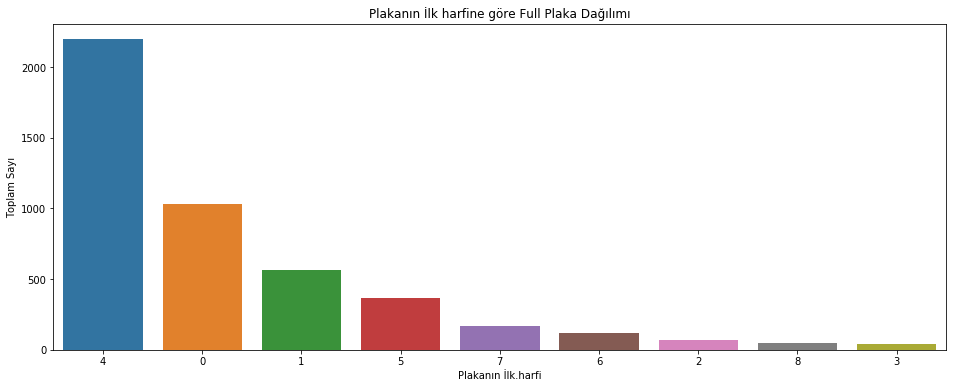

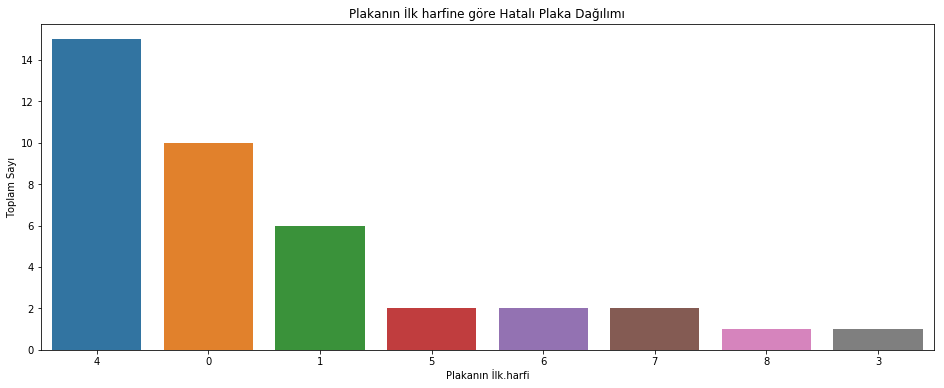

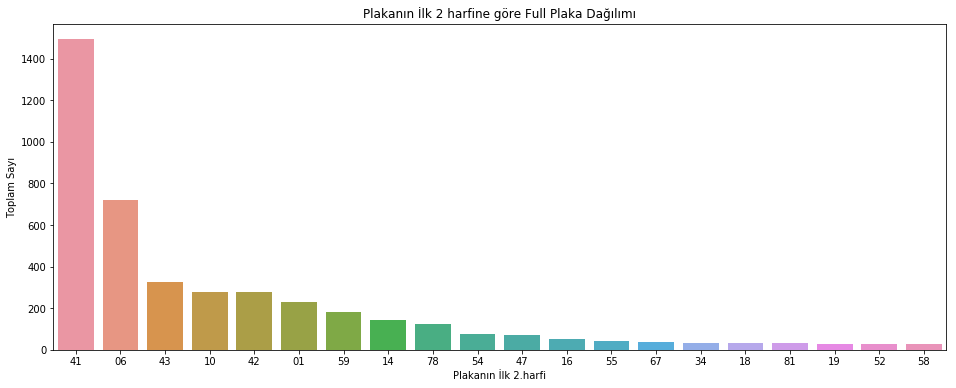

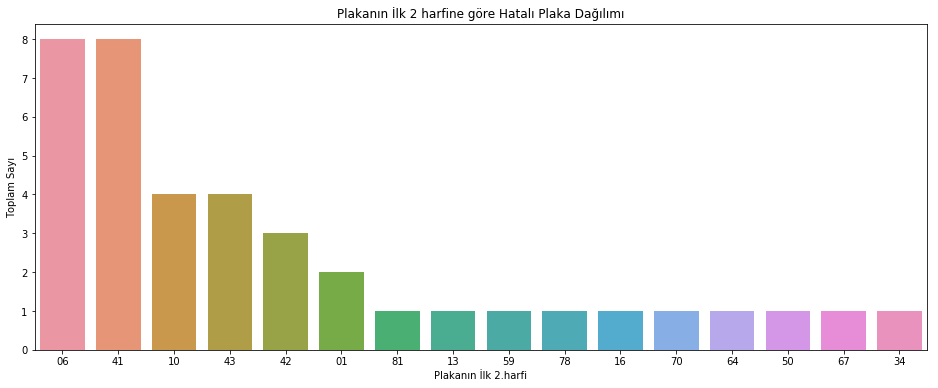

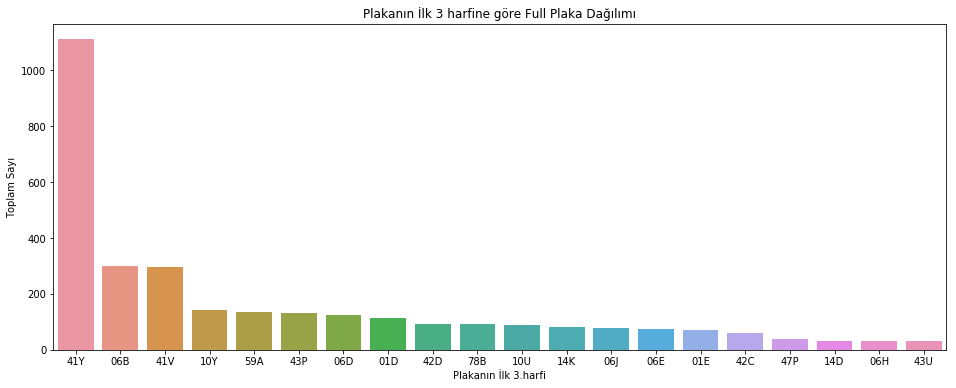

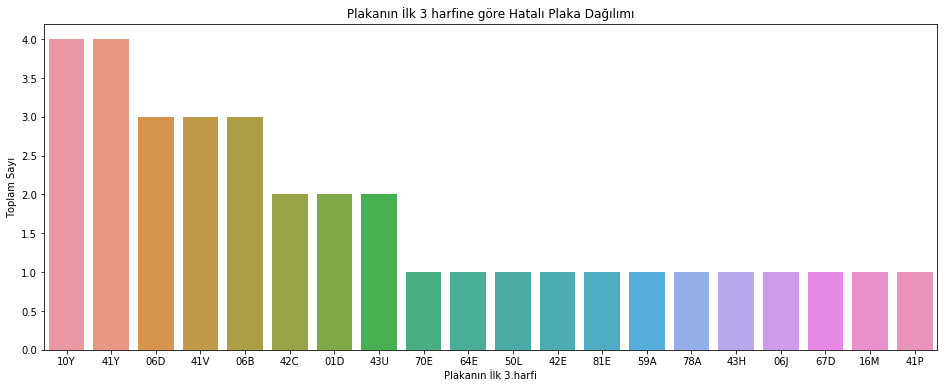

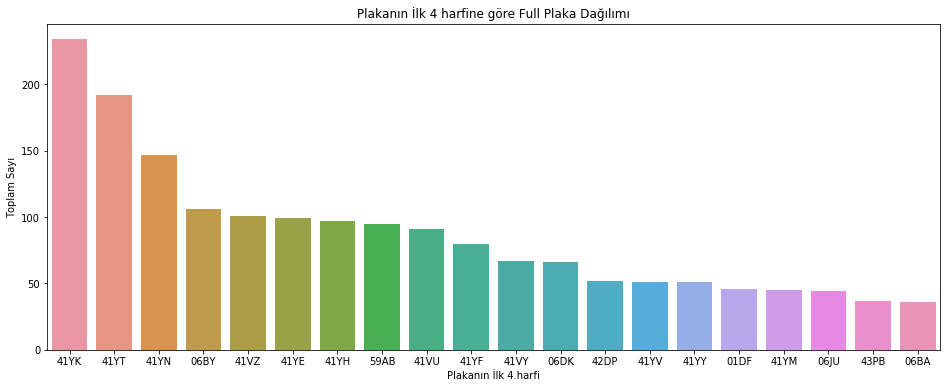

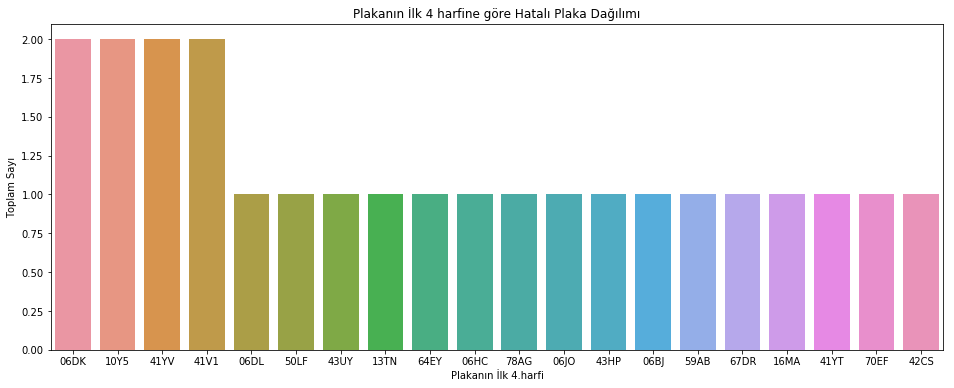

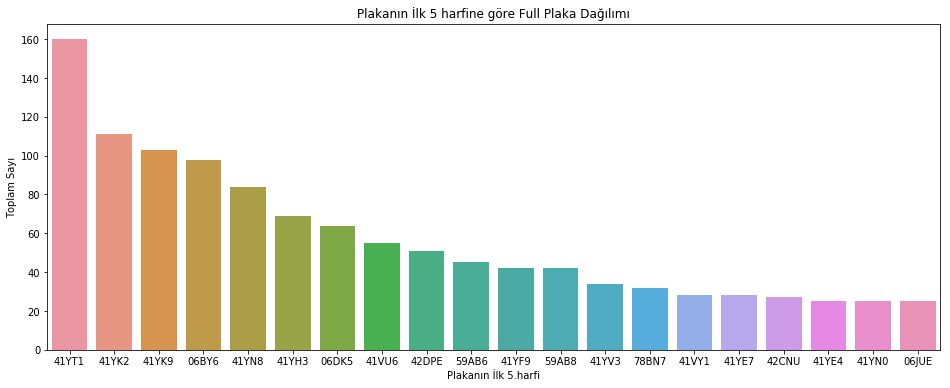

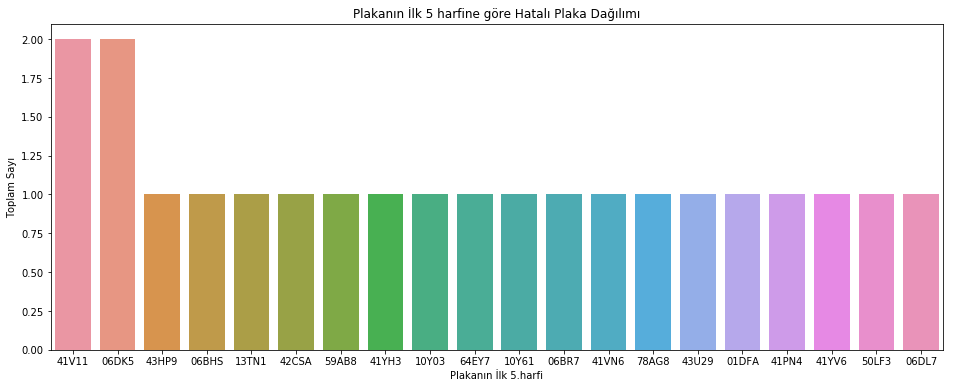

In [12]:
#plot for the 1.st char of plate
p.cnt_plot(df1,'1','İlk',kac_adet,"Full")
p.cnt_plot(df2,'1','İlk',kac_adet,"Hatalı") 

#plot for firt 2 chars of plate
p.cnt_plot(df1['1'] + df1['2'],'1','İlk 2',kac_adet,"Full")
p.cnt_plot(df2['1'] + df2['2'],'1','İlk 2',kac_adet,"Hatalı") 

#plot for first 3 chars of plate
p.cnt_plot(df1['1'] + df1['2'] + df1['3'],'1','İlk 3',kac_adet,"Full")
p.cnt_plot(df2['1'] + df2['2'] + df2['3'],'1','İlk 3',kac_adet,"Hatalı") 

#plot for firt 4 chars of plate
p.cnt_plot(df1['1'] + df1['2'] + df1['3'] + df1['4'],'1','İlk 4',kac_adet,"Full")
p.cnt_plot(df2['1'] + df2['2'] + df2['3'] + df2['4'],'1','İlk 4',kac_adet,"Hatalı")
#first 5
p.cnt_plot(df1['1'] + df1['2'] + df1['3'] + df1['4'] + df1['5'],'1','İlk 5',kac_adet,"Full")
p.cnt_plot(df2['1'] + df2['2'] + df2['3'] + df2['4'] + df2['5'],'1','İlk 5',kac_adet,"Hatalı") 



# from 2nd char to 5 th

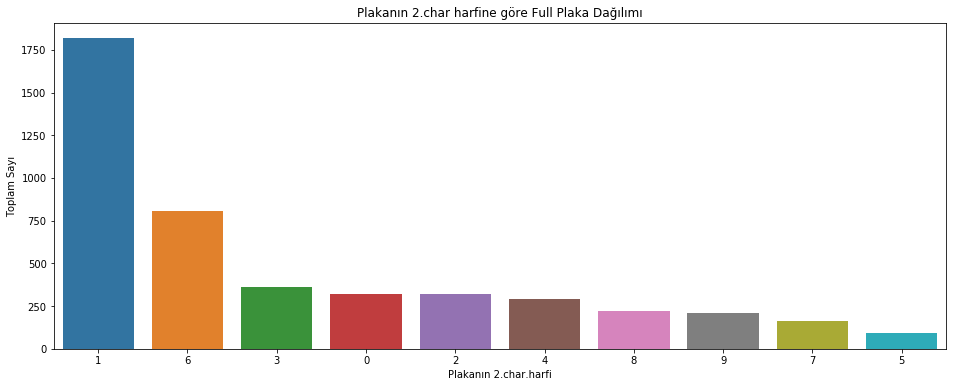

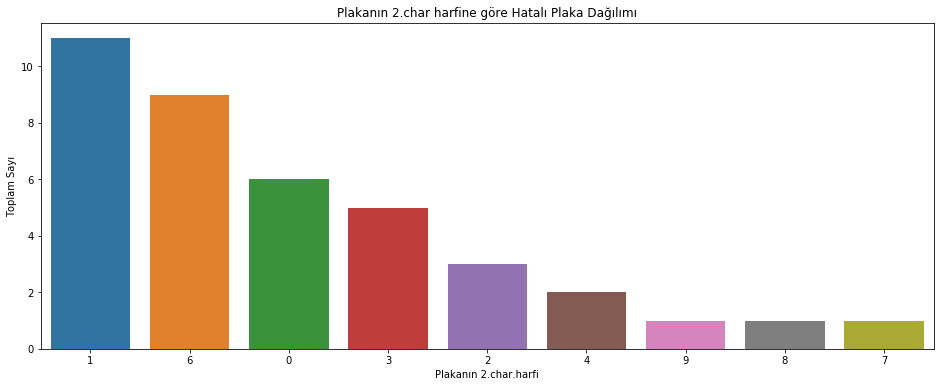

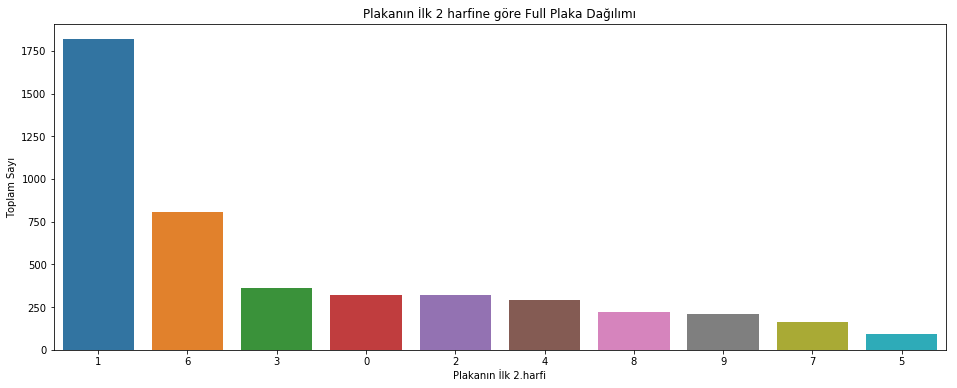

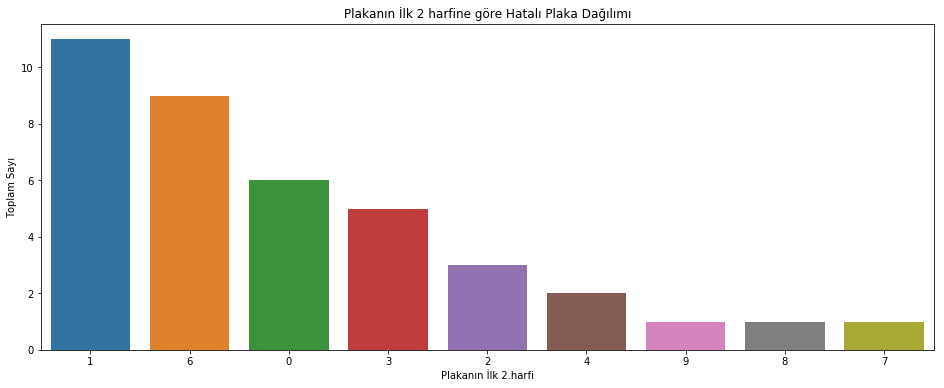

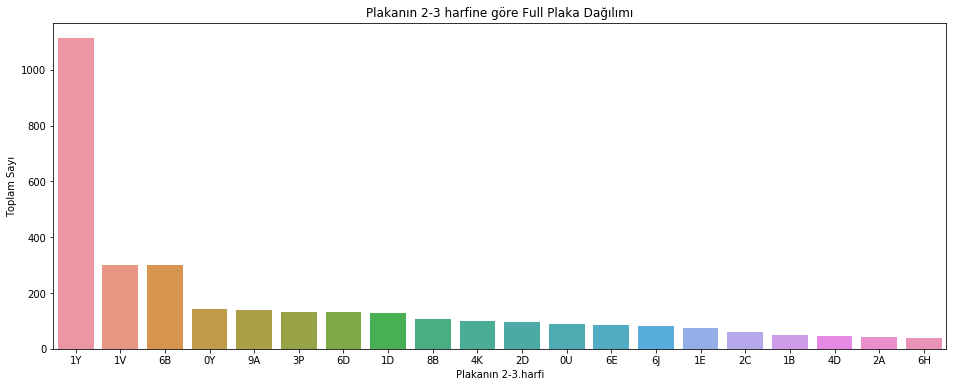

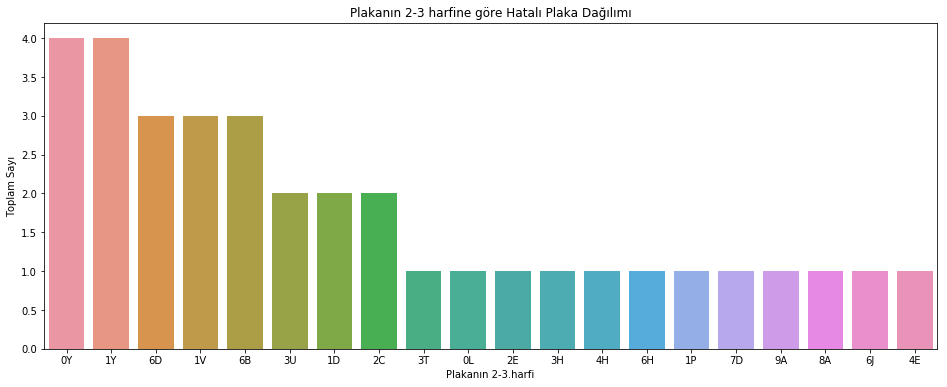

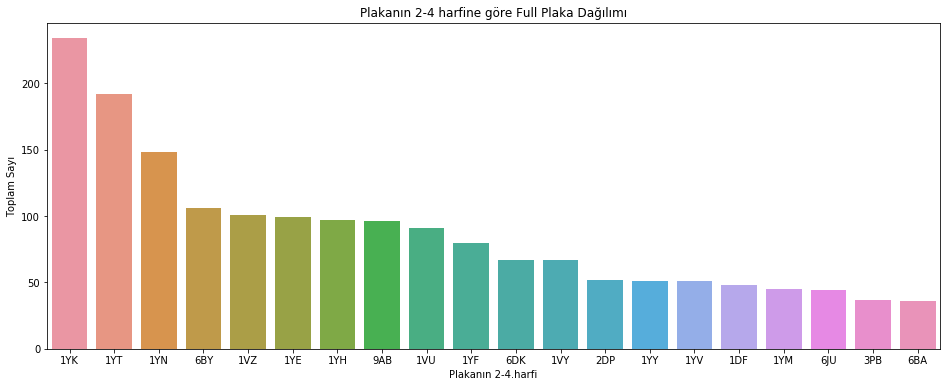

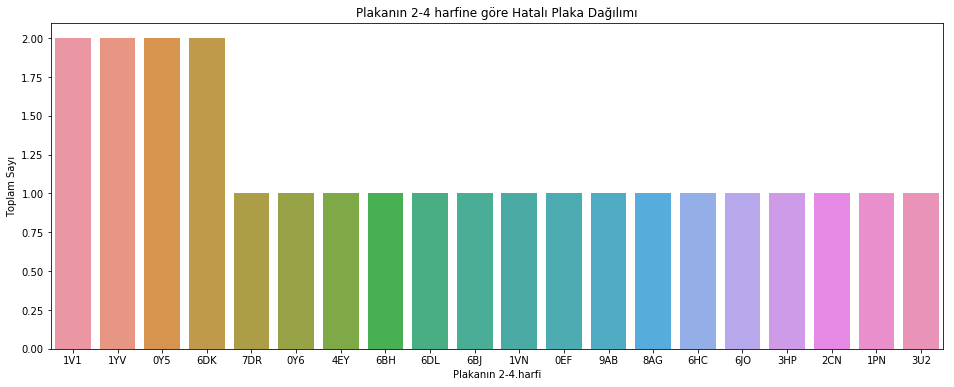

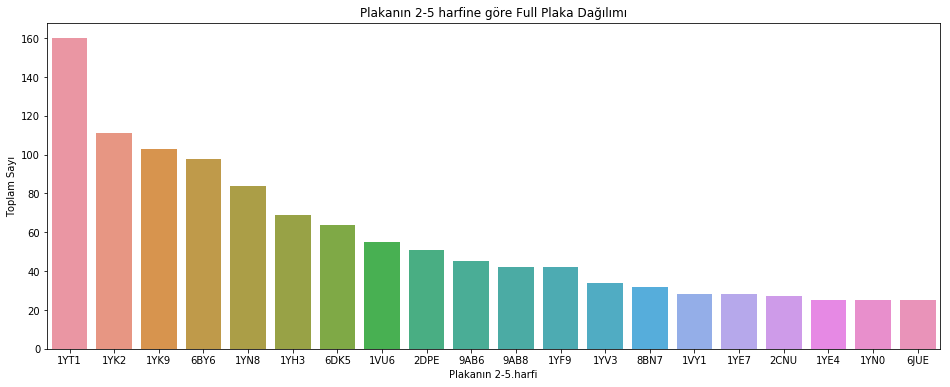

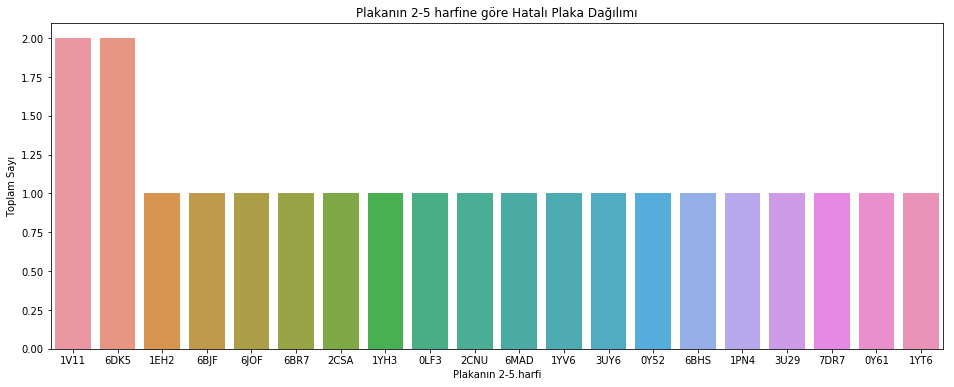

In [13]:
#plot for the 2nd char of plate
p.cnt_plot(df1['2'],'2','2.char',kac_adet,"Full")
p.cnt_plot(df2['2'],'2','2.char',kac_adet,"Hatalı")

#plot for 2+3 chars of plate
p.cnt_plot(df1['2'],'2','İlk 2',kac_adet,"Full")
p.cnt_plot(df2['2'],'2','İlk 2',kac_adet,"Hatalı") 

#plot for 2,3,4 chars of plate
p.cnt_plot(df1['2'] + df1['3'],'2','2-3',kac_adet,"Full")
p.cnt_plot(df2['2'] + df2['3'],'2','2-3',kac_adet,"Hatalı") 

#plot for firt 4 chars of plate
p.cnt_plot(df1['2'] + df1['3'] + df1['4'],'2','2-4',kac_adet,"Full")
p.cnt_plot(df2['2'] + df2['3'] + df2['4'],'2','2-4',kac_adet,"Hatalı")
#first 5
p.cnt_plot(df1['2'] + df1['3'] + df1['4'] + df1['5'],'2','2-5',kac_adet,"Full")
p.cnt_plot(df2['2'] + df2['3'] + df2['4'] + df2['5'],'2','2-5',kac_adet,"Hatalı") 

In [9]:
100- nmatched/(nmatched+matched)*100

91.52173913043478

In [10]:
nmatch_str

['43HP983',
 '78AG824',
 '10Y6152',
 '41YH369',
 '41YV670',
 '41VN690',
 '10Y5869',
 '06DK5303',
 '42CSA31',
 '13TN1268',
 '16MAD05',
 '50LF302',
 '42EBM66',
 '10Y0355',
 '10Y5208',
 '41PN428',
 '43UY621',
 '01DFA251',
 '41YV004',
 '06BR7019',
 '64EY7532',
 '41YT686',
 '70EF039',
 '06DK5907',
 '06DL7323',
 '06JOF31',
 '81EH209',
 '01DJM52',
 '06HC609',
 '06BHS48',
 '34HF8714',
 '43PN686',
 '67DR747',
 '43U2989',
 '06BJF37',
 '42CNU141',
 '59AB875',
 '41V1148',
 '41V1149']